In [5]:
import sys
print(f'Python version:', sys.version)

Python version: 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]


# Tasks

1. Да се реализираат примери за парсирање на FASTA и GenBank формати, онака како што е објаснето во поглавје 2.4 од туторијалот.

2. Да се напишат 3 примери за поврзување со различни биолошки бази, како што е опишано во поглавје 2.5 од туторијалот.

3. Да се напише пример за работа со Seq објекти, какошто е опишано во поглавје 3, и да се обрне внимание на процесите транскрипција и транслација.

4. Да се преземе комплетната ДНА секвенција на Yersinia pestis (бактерија која ги инфектира белите дробови и предизвикува пневмонија). До неа се пристапува со употреба на идентификациониот број NC_005816 во GeneBank базата (работете со `SeqIO` објекти, имате детали во документацијата.

5. Имплеметирајте репликација на секвенцијата потпомогната од функции во biopython.

6. Со помош на biopython, пронајдете ги секвенциите на различните кодни региони означени како (CDS). CDS се регионите добиени после процедурата на отсекување на интроните.

7. Одберете еден CDS и најдете ги сите старт и стоп кодони во неговата РНА.

8. Направете транслација за да ги добиете сите можни протеински секвенции.

9. Одберете еден од кодните региони и направете мутација со поместување на рамката за 2 нуклеотиди. Анализирајте ги новите протеински секвенции. Внимавајте, сега има нови старт и стоп кодони.

10. Да се разработи поглавје 5.5 за креирање на сопствени записи во `FASTA` формат.

11. Да реализира примерот за предвидување на структурата на оперонот кај бактеријата Bacillus subtilis опишан во поглавје 16 од туторијалот. Да се употреби методот на Логистичка регресија и Машини со Поддржувачки Вектори (SVM) и да се споредат резултатите.

12. Да се испрограмира алгоритмот на Nussinovкако функција во python која на влез ќе добива стринг од нуклеотиди, а на излезе ќе ја дава нивната секундарна структура.Влез нека биде следната tRNA молекула:
`ACCGCGGGGCGUCCGGCUCAGCUUGCCGCUGCGGAGCGCCGCAGUAGCCGAAACUUCCGGCUCGGGCCGUGGGCGGUCUCUAGUCGCCCCG`

13. Да се истражи можноста на biopythonза одредување на секундарна структураопишана во поглавје 11.6.8. 

# Imports

Today: 10-April-2020 <br> 

Coronavirus Genome Sequence <br>
FASTA Nucleotide - Coronavirus <br>
Author: Aspie Girl <br>
 •  updated 7 days ago (Version 3)<br>
https://www.kaggle.com/usharengaraju/customer-frauddata <br>

Coronavirus Genome Sequence <br>
2019-nCoV / SARS-CoV-2 <br>
Author: Paul Mooney <br>
 •  updated a month ago (Version 2) <br>
https://www.kaggle.com/paultimothymooney/coronavirus-genome-sequence/data

In [231]:
# Packages
import termcolor as tc
import Bio; print('BioPython version:', Bio.__version__)

# Python packages
import os
import sys
import gc
import string
import pickle
import collections
import random

# Data Science and Computation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy # statistics
import sklearn # machine learning

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Local Imports
import definitions as defs

BioPython version: 1.76


# Solutions

## Task 1. Да се реализираат примери за парсирање на FASTA и GenBank формати, онака како што е објаснето во поглавје 2.4 од туторијалот.

### `FASTA`

In [10]:
from Bio import SeqIO

fasta_file = os.path.join(defs.DATA_DIR, 'coronavirus.fasta')

for seq_record in SeqIO.parse(fasta_file, 'fasta'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

lcl|NC_034972.1_cds_YP_009380519.1_1
Seq('ATGGCTAACCAATATGTCCTGCGTGTAGCAGACTGCACAAACGTTTACTACACT...TAG', SingleLetterAlphabet())
11925
lcl|NC_034972.1_cds_YP_009380520.1_2
Seq('GAGCCCTGTAGTGAGCATCATGTGATAAGGGCTTTTGATATTTACAATAAGGAT...TGA', SingleLetterAlphabet())
8016
lcl|NC_034972.1_cds_YP_009380521.1_3
Seq('ATGGCTCTCATTTTTGTGCTTATGCTCATAACCCTCTATCGTTGCCCTTTTGTC...TGA', SingleLetterAlphabet())
3381
lcl|NC_034972.1_cds_YP_009380522.1_4
Seq('ATGATAGGTGGTCTTTTTTCAGTAGGGTTTGAACAGTTTATACAACATGCTAAT...TAA', SingleLetterAlphabet())
645
lcl|NC_034972.1_cds_YP_009380523.1_5
Seq('ATGTTACCCTCGTTTTTAAGAGTTTTTAATGATGAGGGTGTTGTTCTTAGCGTT...TGA', SingleLetterAlphabet())
237
lcl|NC_034972.1_cds_YP_009380524.1_6
Seq('ATGGTACTCTTTTGTGAGTTTAATGACACTGCCACCAATGGCTGTGAAGCCTGT...TAA', SingleLetterAlphabet())
747
lcl|NC_034972.1_cds_YP_009380525.1_7
Seq('ATGATTTTGGTTTTCCTTGTCCTTATAGCATCAGTTGGTGCTATTACTGATTCT...TAA', SingleLetterAlphabet())
501
lcl|NC_034972.1_cds_YP_009380526.1_8
Seq('ATGAGTTCCAACGTCTCCTGGGC

Notice that the FASTA format does not specify the alphabet, so `Bio.SeqIO` has defaulted to the rather
generic SingleLetterAlphabet() rather than something DNA specific.

### `GenBank`

In [11]:
from Bio import SeqIO

genbank_file = os.path.join(defs.DATA_DIR, 'ls_orchid.gbk')

for seq_record in SeqIO.parse(genbank_file, 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

Z78533.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', IUPACAmbiguousDNA())
740
Z78532.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', IUPACAmbiguousDNA())
753
Z78531.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', IUPACAmbiguousDNA())
748
Z78530.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', IUPACAmbiguousDNA())
744
Z78529.1
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', IUPACAmbiguousDNA())
733
Z78527.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', IUPACAmbiguousDNA())
718
Z78526.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', IUPACAmbiguousDNA())
730
Z78525.1
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA', IUPACAmbiguousDNA())
704
Z78524.1
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC', IUPACAmbiguousDNA())
740
Z78523.1
Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG', IUPAC

This time `Bio.SeqIO` has been able to choose a sensible alphabet, IUPAC Ambiguous DNA. You'll also
notice that a shorter string has been used as the seq_record.id in this case.

## Task 2. Да се напишат 3 примери за поврзување со различни биолошки бази, како што е опишано во поглавје 2.5 од туторијалот.

### 9.2 EInfo: Obtaining information about the Entrez databases

In [13]:
from Bio import Entrez

Entrez.email = 'filip.markoski45@gmail.com'
handle = Entrez.einfo()
result = handle.read()
print(result)

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eInfoResult PUBLIC "-//NLM//DTD einfo 20190110//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20190110/einfo.dtd">
<eInfoResult>
<DbList>

	<DbName>pubmed</DbName>
	<DbName>protein</DbName>
	<DbName>nuccore</DbName>
	<DbName>ipg</DbName>
	<DbName>nucleotide</DbName>
	<DbName>structure</DbName>
	<DbName>sparcle</DbName>
	<DbName>genome</DbName>
	<DbName>annotinfo</DbName>
	<DbName>assembly</DbName>
	<DbName>bioproject</DbName>
	<DbName>biosample</DbName>
	<DbName>blastdbinfo</DbName>
	<DbName>books</DbName>
	<DbName>cdd</DbName>
	<DbName>clinvar</DbName>
	<DbName>gap</DbName>
	<DbName>gapplus</DbName>
	<DbName>grasp</DbName>
	<DbName>dbvar</DbName>
	<DbName>gene</DbName>
	<DbName>gds</DbName>
	<DbName>geoprofiles</DbName>
	<DbName>homologene</DbName>
	<DbName>medgen</DbName>
	<DbName>mesh</DbName>
	<DbName>ncbisearch</DbName>
	<DbName>nlmcatalog</DbName>
	<DbName>omim</DbName>
	<DbName>orgtrack</DbName>
	<DbName>pmc</DbName>
	<DbName>p

In [14]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record.keys()

dict_keys(['DbList'])

In [15]:
record['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'sparcle', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'probe', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [16]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)

print(record["DbInfo"]["Description"])
print(record["DbInfo"]["Count"])
print(record["DbInfo"]["LastUpdate"])

PubMed bibliographic record
30863721
2020/04/10 07:39


In [17]:
for field in record["DbInfo"]["FieldList"]:
    print("%(Name)s, %(FullName)s, %(Description)s" % field)

ALL, All Fields, All terms from all searchable fields
UID, UID, Unique number assigned to publication
FILT, Filter, Limits the records
TITL, Title, Words in title of publication
WORD, Text Word, Free text associated with publication
MESH, MeSH Terms, Medical Subject Headings assigned to publication
MAJR, MeSH Major Topic, MeSH terms of major importance to publication
AUTH, Author, Author(s) of publication
JOUR, Journal, Journal abbreviation of publication
AFFL, Affiliation, Author's institutional affiliation and address
ECNO, EC/RN Number, EC number for enzyme or CAS registry number
SUBS, Supplementary Concept, CAS chemical name or MEDLINE Substance Name
PDAT, Date - Publication, Date of publication
EDAT, Date - Entrez, Date publication first accessible through Entrez
VOL, Volume, Volume number of publication
PAGE, Pagination, Page number(s) of publication
PTYP, Publication Type, Type of publication (e.g., review)
LANG, Language, Language of publication
ISS, Issue, Issue number of publ

### 9.3 ESearch: Searching the Entrez databases

In [19]:
from Bio import Entrez

Entrez.email = 'filip.markoski45@gmail.com'
handle = Entrez.esearch(db="pubmed", term="biopython")
record = Entrez.read(handle)
print(record)

{'Count': '28', 'RetMax': '20', 'RetStart': '0', 'IdList': ['32044951', '31762715', '31278684', '31069053', '30013827', '29641230', '28011774', '24929426', '24497503', '24267035', '24194598', '23842806', '23157543', '22909249', '22399473', '21666252', '21210977', '20015970', '19811691', '19773334'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'biopython[All Fields]', 'Field': 'All Fields', 'Count': '28', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'biopython[All Fields]'}


In [20]:
handle = Entrez.esearch(db="nucleotide", term="Cypripedioideae[Orgn] AND matK[Gene]", idtype="acc")
record = Entrez.read(handle)
print(record["Count"])
print(record["IdList"])

539
['MN016934.1', 'NC_045279.1', 'NC_045278.1', 'NC_045400.1', 'MN602053.1', 'MN535015.1', 'MN535014.1', 'KX886268.1', 'KX886267.1', 'KX886266.1', 'KX886265.1', 'KX886264.1', 'KX886263.1', 'KX886262.1', 'KX886261.1', 'KX886260.1', 'KX886259.1', 'KX886258.1', 'KX886257.1', 'KX886256.1']


In [21]:
handle = Entrez.esearch(db="nlmcatalog", term="computational[Journal]", retmax="20")
record = Entrez.read(handle)
print("{} computational journals found".format(record["Count"]))
print("The first 20 are\n{}".format(record["IdList"]))

172 computational journals found
The first 20 are
['101765300', '101759185', '101752828', '101755127', '101753951', '101753371', '101740904', '101737789', '101736625', '101728813', '101723217', '101754869', '101723351', '101719151', '101718871', '101717513', '101708081', '101707097', '101724357', '101721723']


In [36]:
# EPost
id_list = ["19304878", "18606172", "16403221", "16377612", "14871861", "14630660"]
result = Entrez.epost('pubmed', id=','.join(id_list)).read()
print(tc.colored(result, 'red'))
# ESummary
result = Entrez.esummary(db='nlmcatalog', id='101660833').read()
print(tc.colored(result, 'green'))
# EFetch
result = Entrez.efetch(db='nucleotide', id='EU490707', rettype='gb', retmode='text').read()
print(tc.colored(result, 'blue'))

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE ePostResult PUBLIC "-//NLM//DTD epost 20090526//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20090526/epost.dtd"><ePostResult>
	<QueryKey>1</QueryKey>
	<WebEnv>NCID_1_161128255_130.14.18.48_9001_1586544646_602676031_0MetA0_S_MegaStore</WebEnv>
</ePostResult>

<?xml version="1.0" encoding="UTF-8" ?>
<!DOCTYPE eSummaryResult PUBLIC "-//NLM//DTD esummary v1 20041029//EN" "https://eutils.ncbi.nlm.nih.gov/eutils/dtd/20041029/esummary-v1.dtd">
<eSummaryResult>
<DocSum>
	<Id>101660833</Id>
	<Item Name="Host" Type="String"></Item>
	<Item Name="NLMUniqueID" Type="String">101660833</Item>
	<Item Name="AuthorList" Type="List">
		<Item Name="AuthorInfo" Type="Structure">
			<Item Name="CollectiveName" Type="String">Institute of Electrical and Electronics Engineers.</Item>
			<Item Name="LastName" Type="String"></Item>
			<Item Name="ForeName" Type="String"></Item>
			<Item Name="NameQualifier" Type="String"></Item>
			<Item Name="OtherInformatio

### 9.8 EGQuery: Global Query - counts for search terms

In [39]:
handle = Entrez.egquery(term="sars-cov-2")
record = Entrez.read(handle)
for row in record["eGQueryResult"]:
    print(row["DbName"], row["Count"])

pubmed 1380
pmc 971
mesh 6
books 7
pubmedhealth 0
omim 2
ncbisearch 9
nuccore 552
nucgss Error
nucest Error
protein 5615
genome 1
structure 106
taxonomy 1
snp 0
dbvar 0
gene 24
sra 891
biosystems 0
unigene Error
cdd 0
clone Error
popset 24
geoprofiles 0
gds 18
homologene 0
pccompound 0
pcsubstance 187
pcassay 38
nlmcatalog 0
probe 1
gap 1
proteinclusters 0
bioproject 41
biosample 874
biocollections 1


### 9.9 ESpell: Obtaining spelling suggestions

In [47]:
handle = Entrez.espell(term='virrusss')
record = Entrez.read(handle)
record

{'Database': 'pubmed', 'Query': 'virrusss', 'CorrectedQuery': 'viruses', 'SpelledQuery': ['', 'viruses']}

### 10.1.1 Parsing Swiss-Prot records

In [48]:
from urllib.request import urlopen # Python 3 only
from io import TextIOWrapper

opener = urlopen("https://raw.githubusercontent.com/biopython/biopython/master/Tests/SwissProt/F2CXE6.txt")
handle = TextIOWrapper(opener)

from Bio import SwissProt
record = SwissProt.read(handle)
print(record.description)

SubName: Full=Plasma membrane intrinsic protein {ECO:0000313|EMBL:BAN04711.1}; SubName: Full=Predicted protein {ECO:0000313|EMBL:BAJ87517.1};


### 10.5 Accessing the ExPASy server

In [49]:
for ref in record.references:
    print("authors:", ref.authors)
    print("title:", ref.title)
    print(record.organism_classification)

authors: Matsumoto T., Tanaka T., Sakai H., Amano N., Kanamori H., Kurita K., Kikuta A., Kamiya K., Yamamoto M., Ikawa H., Fujii N., Hori K., Itoh T., Sato K.
title: Comprehensive sequence analysis of 24,783 barley full-length cDNAs derived from 12 clone libraries.
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', 'Poaceae', 'BEP clade', 'Pooideae', 'Triticeae', 'Hordeum']
authors: Shibasaka M., Sasano S., Utsugi S., Katsuhara M.
title: Functional characterization of a novel plasma membrane intrinsic protein2 in barley.
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', 'Poaceae', 'BEP clade', 'Pooideae', 'Triticeae', 'Hordeum']
authors: Shibasaka M., Katsuhara M., Sasano S.
title: 
['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Poales', '

In [55]:
from Bio import ExPASy
from Bio import SwissProt
accessions = ["O23729", "O23730", "O23731"]
records = []

for accession in accessions:
    handle = ExPASy.get_sprot_raw(accession)
    try:
        record = SwissProt.read(handle)
    except:
        print("WARNING: Accession %s not found" % accession)

    records.append(record)

In [67]:
from Bio import SCOP

'''
def search(
    pdb=None,
    key=None,
    sid=None,
    disp=None,
    dir=None,
    loc=None,
    cgi="http://scop.mrc-lmb.cam.ac.uk/scop/search.cgi",
    **keywds
):
'''

# 2000668HIV-1 VPU cytoplasmic domain
scop_id = '2000668'

cgi = 'http://scop.mrc-lmb.cam.ac.uk/search?t=txt'
handle = SCOP.search(key=scop_id, cgi=cgi)

print(tc.colored('biopython does not have this feature well supported', attrs=['bold']))

biopython does not have this feature well supported


## Task 3. Да се напише пример за работа со `Seq` објекти, како што е опишано во поглавје 3, и да се обрне внимание на процесите транскрипција и транслација.

In [85]:
sars_cov_2_file = os.path.join(defs.DATA_DIR, 'MN908947.fna')
sars_cov_2_record = list(SeqIO.parse(sars_cov_2_file, 'fasta'))[0]

Let's just work with the first one.

In [87]:
type(sars_cov_2_record)

Bio.SeqRecord.SeqRecord

In [88]:
sars_cov_2_record.seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())

In [99]:
sars_cov_2_record.seq.alphabet

SingleLetterAlphabet()

source: https://dmnfarrell.github.io/bioinformatics/genomics-sarscov2-python <br>
The genome of the newly emerging CoV consists of a single, <b>positive-stranded RNA</b> that is approximately 30k nucleotides long. The overall genome organization of the newly emerging CoV is similar to that of other coronaviruses.

In [124]:
for letter in ['U', 'C', 'A', 'G', 'T']:
    print(letter, sars_cov_2_record.seq.count(letter))

U 0
C 5492
A 8954
G 5863
T 9594


source: https://en.wikipedia.org/wiki/Virus <br>
When not inside an infected cell or in the process of infecting a cell, viruses exist in the form of independent particles, or virions, consisting of: (i) the genetic material, i.e. <b>long molecules of DNA or RNA</b> that encode the structure of the proteins by which the virus acts; (ii) a protein coat, the capsid, which surrounds and protects the genetic material; and in some cases (iii) an outside envelope of lipids. 



Since input sequence is FASTA (DNA), and Coronavirus is RNA type of virus, we need to:

    Transcribe DNA to RNA (ATTAAAGGTT... => AUUAAAGGUU...)
    Translate RNA to Amino acid sequence (AUUAAAGGUU... => IKGLYLPR*Q...)

In the current scenario, the .fna file starts with ATTAAAGGTT, then we call transcribe() so T (thymine) is replaced with U (uracil), so we get the RNA sequence which starts with AUUAAAGGUU.

When we translate() the RNA sequence to amino-acid sequence, we get something like IKGLYLPR*Q ( is so called STOP codon, effectively is separator for proteins). In our scenario, sequence looks like this: IKGLYLPR*QTNQLSISCRSVL*TNFKICV, where:

    IKGLYLPR encodes first protein (every letter encodes single amino-acid)
    QTNQLSISCRSVL encodes second protein, and so on



In [126]:
from Bio.Alphabet import IUPAC

b = 3 * 15 # bounding index, a multiple of 3 because codons are triplets.

# So, I guess it's better to treat it with a DNA alphabet...
dna_corona = Seq(str(sars_cov_2_record.seq), IUPAC.ambiguous_dna);
print('dna_corona:', dna_corona[:b])
messenger_rna = dna_corona.transcribe()
print('messenger_rna:', messenger_rna[:b])

dna_corona: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCG
messenger_rna: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCG


In [127]:
print('Total nucleotides:', len(messenger_rna))

Total nucleotides: 29903


In [129]:
from Bio.SeqUtils import GC

print('GC:', GC(messenger_rna))

GC: 37.97277865097148


In [130]:
len(messenger_rna) % 3 == 0

False

In [136]:
# Obtain Amino Acid Sequence from mRNA (translation)
amino_acids = messenger_rna.translate(table=1, cds=False) 

print('Amino Acids:', amino_acids[:b])
print('Total Amino acids:', len(amino_acids))

Amino Acids: IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*L
Total Amino acids: 9967


In [143]:
#Identify all the Proteins (chains of amino acids)
Proteins = amino_acids.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))

df['length'] = df[0].apply(lambda x: len(x))
df.rename(columns={0: "sequence"}, inplace=True)
df.tail()

Total proteins: 775


D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


,sequence,length
770,"(S, H, I, A, I, F, N, Q, C, V, T, L, G, R, T)",15
771,"(K, S, H, H, I, F, T, E, A, T, R, S, T, I, E, ...",43
772,(F),1
773,(),0
774,"(L, L, R, R, M, T, K, K, K, K, K, K, K, K, K, K)",16


## Task 4. Да се преземе комплетната ДНА секвенција на Yersinia pestis (бактерија која ги инфектира белите дробови и предизвикува пневмонија). До неа се пристапува со употреба на идентификациониот број NC_005816 во GeneBank базата (работете со `SeqIO` објекти, имате детали во документацијат

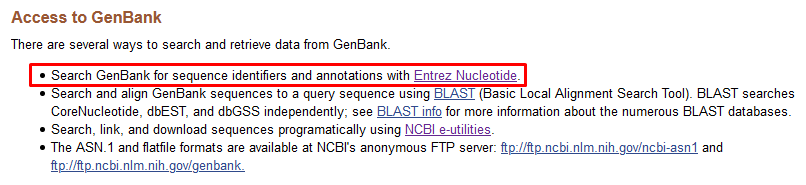

In [146]:
handle = Entrez.einfo()
record = Entrez.read(handle)
record['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'sparcle', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'probe', 'proteinclusters', 'pcassay', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [194]:
handle = Entrez.efetch(db='nuccore', id='NC_005816', rettype='gb', retmode='text')
yersinia = SeqIO.read(handle, 'genbank')
handle.close()
print(yersinia.id)
print(yersinia.description)

NC_005816.1
Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence


In [195]:
yersinia.seq 

UnknownSeq(9609, alphabet=IUPACAmbiguousDNA(), character='N')

Since Entrez doesn't provide the correct sequence, the one used here is found here: <br>
https://raw.githubusercontent.com/biopython/biopython/master/Tests/GenBank/NC_005816.gb

In [204]:
yersinia_file = os.path.join(defs.DATA_DIR, 'NC_005816.gb')

for seq_record in SeqIO.parse(yersinia_file, 'genbank'):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

NC_005816.1
Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG', IUPACAmbiguousDNA())
9609


In [205]:
yersinia = list(SeqIO.parse(yersinia_file, 'genbank'))[0]
print(yersinia)

ID: NC_005816.1
Name: NC_005816
Description: Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Database cross-references: Project:58037
Number of features: 41
/molecule_type=DNA
/topology=circular
/data_file_division=BCT
/date=21-JUL-2008
/accessions=['NC_005816']
/sequence_version=1
/gi=45478711
/keywords=['']
/source=Yersinia pestis biovar Microtus str. 91001
/organism=Yersinia pestis biovar Microtus str. 91001
/taxonomy=['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia']
/references=[Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)]
/comment=PROVISIONAL REFSEQ: This record has not yet been subject to final
NCBI review. The 

## Task 5. Имплеметирајте репликација на секвенцијата потпомогната од функции во biopython.


| ![image.png](docs/images/leading_strand.png)	|   ![image.png](docs/images/lagging_strand.png) 	|
|---	|---	|
|  ![image.png](docs/images/dna_ligase.png) 	|   ![image.png](docs/images/transcription.png)	|

> The actual biological transcription process works from the template strand, doing a reverse complement
(TCAG -> CUGA) to give the mRNA. However, in Biopython and bioinformatics in general, <b>we typically
work directly with the coding strand</b> because this means we can get the mRNA sequence just by switching
T -> U.

DNA polymerase can only copy strands in the 5' to 3' direction

#### First a simple example

In [167]:
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
# this is 5' to 3'
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna)
print("5' to 3':", coding_dna)

5' to 3': ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


In [169]:
template_strand = coding_dna.complement()
print("3' to 5':", template_strand)

3' to 5': TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC


In [170]:
# because the DNA polymerase works only in the 5' to 3' direction we must reverse the template_stand
reversed_template_strand = template_strand[::-1]
print("5' to 3':", reversed_template_strand)

5' to 3': CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT


In [171]:
# now we my construct the compliment to each parent strand
coding_dna_partner = coding_dna.complement()
reversed_template_strand_partner = reversed_template_strand.complement()

print("3' to 5':", coding_dna_partner)
print("3' to 5':", reversed_template_strand_partner)

3' to 5': TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
3' to 5': GATAGCCCGTGGGAAAGTCGCCGGGTAATGTTACCGGTA


In [176]:
# we must reverse the reversed partner thereby setting it back to its original direction
template_strand_partner = reversed_template_strand_partner[::-1]
print("5' to 3':", template_strand_partner)

5' to 3': ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


In [179]:
# finally, join each parent strand with their newly constructed partner
L = len(coding_dna)

print(tc.colored('Coding parent strand', attrs=['bold']))
print(coding_dna)
print('|' * L)
print(coding_dna_partner)

print()

print(tc.colored('Template parent strand', attrs=['bold']))
print(template_strand)
print('|' * L)
print(template_strand_partner)

Coding parent strand
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
|||||||||||||||||||||||||||||||||||||||
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC

Template parent strand
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
|||||||||||||||||||||||||||||||||||||||
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


#### Let's constuct a function that uses this simple example as the foundation for our logic

In [180]:
def dna_replication(dna_coding_strand):
    dna_template_strand = dna_coding_strand.complement()
    reversed_dna_template_strand = dna_template_strand[::-1]
    
    # now we my construct the compliment to each parent strand
    dna_coding_strand_partner = dna_coding_strand.complement()
    reversed_dna_template_strand_partner = reversed_dna_template_strand.complement()
    
    # we must reverse the reversed partner thereby setting it back to its original direction
    dna_template_strand_partner = reversed_dna_template_strand_partner[::-1]
    
    # finally, join each parent strand with their newly constructed partner
    L = len(dna_coding_strand)

    print(tc.colored('Coding parent strand', attrs=['bold']))
    print(dna_coding_strand)
    print('|' * L)
    print(dna_coding_strand_partner)

    print()

    print(tc.colored('Template parent strand', attrs=['bold']))
    print(dna_template_strand)
    print('|' * L)
    print(dna_template_strand_partner)

In [181]:
dna_replication(coding_dna)

Coding parent strand
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
|||||||||||||||||||||||||||||||||||||||
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC

Template parent strand
TACCGGTAACATTACCCGGCGACTTTCCCACGGGCTATC
|||||||||||||||||||||||||||||||||||||||
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


#### Since the function works, we may simply use it on our yersenia DNA (shortened to 50 base pairs)

In [207]:
dna_replication(yersinia.seq[:50])

Coding parent strand
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATC
||||||||||||||||||||||||||||||||||||||||||||||||||
ACATTGCTTGCCACGTTATCACTAGGTGTGGGTTGCGGACTTTAGTCTAG

Template parent strand
ACATTGCTTGCCACGTTATCACTAGGTGTGGGTTGCGGACTTTAGTCTAG
||||||||||||||||||||||||||||||||||||||||||||||||||
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATC


## Task 6. Со помош на biopython, пронајдете ги секвенциите на различните кодни региони означени како (CDS). CDS се регионите добиени после процедурата на отсекување на интроните.

source: https://en.wikipedia.org/wiki/Coding_region <br>
The coding region of a gene, also known as the <b>CDS (from coding sequence)</b>, is the portion of a gene's DNA or RNA that codes for protein.[1] Studying the length, composition, regulation, splicing, structures, and functions of coding regions compared to non-coding regions over different species and time periods can provide a significant amount of important information regarding gene organization and evolution of prokaryotes and eukaryotes.[2] This can further assist in mapping the human genome and developing gene therapy.

In [211]:
set(map(lambda f: f.type, yersenia.features))

{'CDS', 'gene', 'misc_feature', 'repeat_region', 'source', 'variation'}

In [7]:
max_len = 10 ** 6
shortest_cds = 0

for feature in yersinia.features:
    if feature.type == 'CDS':
        print(tc.colored(f'Length: {len(feature)}', attrs=['bold']))
        print(feature)        
        print()
        
        if len(feature) < max_len:
            max_len = len(feature)
            shortest_cds = feature

Length: 1023
type: CDS
location: [86:1109](+)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GI:45478712', 'GeneID:2767718']
    Key: locus_tag, Value: ['YP_pPCP01']
    Key: note, Value: ['similar to corresponding CDS from previously sequenced pPCP plasmid of Yersinia pestis KIM (AF053945) and CO92 (AL109969), also many transposase entries for insertion sequence IS100 of Yersinia pestis. Contains IS21-like element transposase, HTH domain (Interpro|IPR007101)']
    Key: product, Value: ['putative transposase']
    Key: protein_id, Value: ['NP_995567.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA']




## Task 7. Одберете еден CDS и најдете ги сите старт и стоп кодони во неговата РНА.

Choosing the shortest CDS to work with.

### Yersinia is a bacteria!

In [8]:
from Bio import SeqIO

yersinia_file = os.path.join(defs.DATA_DIR, 'NC_005816.gb')
yersinia = list(SeqIO.parse(yersinia_file, 'genbank'))[0]

In [69]:
# putative replication regulatory protein
yersinia_dna_coding_seq = shortest_cds.extract(yersinia.seq)
print(yersinia_dna_coding_seq)
print('length of yersinia sequence:', len(yersinia_dna_coding_seq))
print('is it a multiple of 3:', len(yersinia_dna_coding_seq) % 3 == 0)

GTGAACAAACAACAACAAACTGCGCTGAATATGGCGCGATTTATCAGAAGCCAGAGCCTGATACTGCTTGAAAAACTGGATGCTCTGGATGCCGACGAGCAGGCGGCCATGTGTGAACGACTGCACGAACTCGCGGAAGAACTCCAGAACAGCATCCAGGCTCGCTTTGAAGCCGAAAGTGAAACAGGAACATAA
length of yersinia sequence: 195
is it a multiple of 3: True


source: https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi

In [58]:
lst = list(range(11))
print(lst)
print()
for i in range(len(lst) - 2):
    print(lst[i:i+3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 8]
[7, 8, 9]
[8, 9, 10]


In [74]:
yersinia_cds_mRNA = yersinia_dna_coding_seq.transcribe(); yersinia_cds_mRNA

Seq('GUGAACAAACAACAACAAACUGCGCUGAAUAUGGCGCGAUUUAUCAGAAGCCAG...UAA', IUPACAmbiguousRNA())

Below is probably the needed solution to the exercise. It looks for the typical start and stop codons in the messenger RNA, which was obtained by transcribing the yersinia DNA coding parent strand.
 <br> <br>
Following from the Wikipedia source, truly, the start codons are AUG, whilst the stop codons are UAA, UAG, UGA. <br>
https://en.wikipedia.org/wiki/Bacterial_translation

In [82]:
start_codons = list()
stop_codons = list()

for i in range(len(yersinia_cds_mRNA) - 2):
    codon = (i, yersinia_cds_mRNA[i:i+3])
    if codon[1] in ['AUG']:
        start_codons.append(codon)
    elif codon[1] in ['UAA', 'UAG', 'UGA']:
        stop_codons.append(codon)

print('start_codons:', len(start_codons), os.linesep, 
      list(map(lambda codon: (codon[0], str(codon[1])), start_codons)))

print()

print('stop_codons', len(stop_codons), os.linesep, 
      list(map(lambda codon: (codon[0], str(codon[1])), stop_codons)))

start_codons: 4 
 [(30, 'AUG'), (79, 'AUG'), (88, 'AUG'), (108, 'AUG')]

stop_codons 8 
 [(1, 'UGA'), (25, 'UGA'), (58, 'UGA'), (68, 'UGA'), (113, 'UGA'), (167, 'UGA'), (179, 'UGA'), (192, 'UAA')]


So, using the messenger RNA obtained by transcribing the DNA coding parent strand is the more traditional approach.
<br> <br>
From the following link (https://en.wikipedia.org/wiki/DNA_codon_table) <br>
It mentions that most genes are now discovered at the DNA level. <br>
Although the stop codons provided by the `Bacterial` DNA codon table below are truly the messenger RNA stop codons only reverse transcribed, seemingly there are a far more start codons. Perhaps findings based in bio-chemistry explain for the varying start codons when looking at them from the level of DNA.

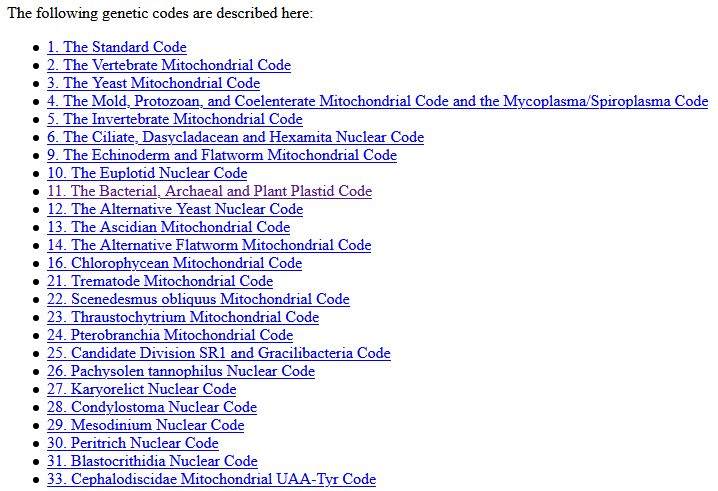

In [45]:
from Bio.Data import CodonTable

bacterial_table = CodonTable.unambiguous_dna_by_name['Bacterial']
print(bacterial_table)

print('Bacterial start codons:', bacterial_table.start_codons)
print('Bacterial stop codons:', bacterial_table.stop_codons)

Table 11 Bacterial, Archaeal, Plant Plastid

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA I(s)| ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG

In [84]:
start_codons = list()
stop_codons = list()

for i in range(len(yersinia_protein) - 2):
    codon = (i, yersinia_protein[i:i+3])
    if codon[1] in bacterial_table.start_codons:
        start_codons.append(codon)
    elif codon[1] in bacterial_table.stop_codons:
        stop_codons.append(codon)

print('start_codons:', len(start_codons), os.linesep, 
      list(map(lambda codon: (codon[0], str(codon[1])), start_codons)))

print()

print('stop_codons', len(stop_codons), os.linesep, 
      list(map(lambda codon: (codon[0], str(codon[1])), stop_codons)))

start_codons: 23 
 [(0, 'GTG'), (19, 'CTG'), (24, 'CTG'), (28, 'ATA'), (30, 'ATG'), (38, 'ATT'), (42, 'ATC'), (57, 'CTG'), (60, 'ATA'), (63, 'CTG'), (67, 'TTG'), (75, 'CTG'), (79, 'ATG'), (84, 'CTG'), (88, 'ATG'), (108, 'ATG'), (110, 'GTG'), (112, 'GTG'), (120, 'CTG'), (153, 'ATC'), (166, 'TTG'), (178, 'GTG'), (191, 'ATA')]

stop_codons 8 
 [(1, 'TGA'), (25, 'TGA'), (58, 'TGA'), (68, 'TGA'), (113, 'TGA'), (167, 'TGA'), (179, 'TGA'), (192, 'TAA')]


## Task 8. Направете транслација за да ги добиете сите можни протеински секвенции.

In [99]:
amino_acids

SeqRecord(seq=Seq('CNERCNSDPHPTPEIRSRG*SALLIQESLWSLLRQLWKLKSCTSRE*VAGRLPE...RPL', HasStopCodon(ExtendedIUPACProtein(), '*')), id='<unknown id>', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [103]:
# Yersinia is a bacteria
# yersinia_dna_coding_seq = shortest_cds.extract(yersinia.seq)

amino_acids = yersinia.translate(table='Bacterial', cds=False)
print('total amino acids:', len(amino_acids))

proteins = amino_acids.seq.split('*')
df = pd.DataFrame(data=proteins)

df.describe()
print('total proteins:', len(df))

df['length'] = df[0].apply(lambda x: len(x))
df['sequence_str'] = df[0].apply(lambda x: str(x))
df.rename(columns={0: "sequence"}, inplace=True)
df.tail()

total amino acids: 3203
total proteins: 126


D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


,sequence,length,sequence_str
121,"(L, I, R, T, F, L, N, F, R, A, L, P, V, F, H, ...",59,LIRTFLNFRALPVFHFVISLKLPKVDNTRYFFAHIKPLLQAEGLFL...
122,"(G, R, M, I, R, T, E, S, M, V, N, M, S, S, P, ...",36,GRMIRTESMVNMSSPDFCISEYKTLFNGMQNQKIKM
123,"(H, R, N, A, R)",5,HRNAR
124,(Y),1,Y
125,"(R, M, R, E, C, V, P, R, P, L)",10,RMRECVPRPL


In [113]:
functional_proteins = df.loc[df['length'] >= 50]
print('total functional proteins:', len(functional_proteins))
functional_proteins

total functional proteins: 17


,sequence,length,sequence_str
2,"(V, A, G, R, L, P, E, N, W, G, S, P, A, I, P, ...",61,VAGRLPENWGSPAIPLNVICRQNLSRQNIRRDLLLLHSWMNTGIIF...
4,"(P, F, S, G, H, S, F, V, L, S, R, F, L, R, S, ...",92,PFSGHSFVLSRFLRSRSLPFGSKLNPDDRCRLTGALCVMVAHRFTC...
5,"(K, L, W, F, C, N, V, T, H, I, R, P, V, S, T, ...",60,KLWFCNVTHIRPVSTGSILRCGSSARRWASLPDCVAPSGHRLKVRW...
7,"(L, A, C, A, R, W, G, S, L, S, M, L, K, Q, P, ...",68,LACARWGSLSMLKQPTATVCAGCTMSLTNESMKQSRPVPAIAGSKS...
8,"(T, S, T, N, T, P, C, I, I, H, S, P, S, T, T, ...",70,TSTNTPCIIHSPSTTHSAEEWRDDGTATSTTDGARRAVATGKPYKR...
32,"(R, I, D, G, T, A, S, R, S, T, K, N, R, C, C, ...",62,RIDGTASRSTKNRCCTQSVVLQTALRQIEKVPYFQECPETMCQTSF...
40,"(Y, C, L, K, N, W, M, L, W, M, P, T, S, R, R, ...",72,YCLKNWMLWMPTSRRPCVNDCTNSRKNSRTASRLALKPKVKQEHNE...
44,"(K, V, H, H, V, R, C, E, M, P, H, R, C, V, R, ...",64,KVHHVRCEMPHRCVRRTCRCRCSSASSLTDSLRSVVRLRRAVSAHS...
45,"(A, K, N, E, D, P, R, K, G, R, A, G, G, A, F, ...",79,AKNEDPRKGRAGGAFSIGSAPLTSITKIDAQVRGGETRQDLKIPGV...
56,"(E, Q, D, G, R, G, N, D, L, K, V, I, L, L, G, ...",67,EQDGRGNDLKVILLGSHIFIIKWPCRKKHIYSKRHLAKPRIKYLWQ...


In [143]:
# do it with features, the proteins are already found

for feature in yersinia.features:
    if feature.type == 'CDS':
        print(tc.colored(f'Length: {len(feature)}', attrs=['bold']))
        print(feature.location)
        print(feature.qualifiers['protein_id'])        
        translation = feature.qualifiers['translation'][0]
        print(translation)        
        
        print()
        sequence = feature.location.extract(yersinia).seq
        sequence_translated = sequence.translate(table='Bacterial', cds=True)
        print(sequence_translated)
        
        comparison = (str(translation) == str(sequence_translated))
            
        if comparison:
            print(tc.colored('True', 'green', attrs=['bold']))
        else: 
            print(tc.colored('False', 'red', attrs=['bold']))
        
        print()
        

Length: 1023
[86:1109](+)
['NP_995567.1']
MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA

MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA
True

Length: 783
[1105:1888](+)
['NP_995568.1']
MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHEEKLARHQRKQAMYTRMAAFPAVKTFEEYDFTFATGAPQKQLQSLRSLSFIERNENIVLLGPSGVGKTHLAIAMGYEAVRAGIKVRFTTAADLLLQLSTAQRQGRYKTTLQRGVMAPRLLIIDEIGYLPFSQEEAKLFFQVIAKRYEKSAMILTSNLPFGQWDQTFAGDAALTSAML

## Task 9. Одберете еден од кодните региони и направете мутација со поместување на рамката за 2 нуклеотиди. Анализирајте ги новите протеински секвенции. Внимавајте, сега има нови старт и стоп кодони.

In [147]:
# yersinia_dna_coding_seq = shortest_cds.extract(yersinia.seq)
print(len(yersinia_dna_coding_seq))
yersinia_dna_coding_seq
yer

195


Seq('GTGAACAAACAACAACAAACTGCGCTGAATATGGCGCGATTTATCAGAAGCCAG...TAA', IUPACAmbiguousDNA())

In [149]:
# yersinia_cds_mRNA = yersinia_dna_coding_seq.transcribe()
print(len(yersinia_cds_mRNA))
yersinia_cds_mRNA

195


Seq('GUGAACAAACAACAACAAACUGCGCUGAAUAUGGCGCGAUUUAUCAGAAGCCAG...UAA', IUPACAmbiguousRNA())

In [150]:
mutated_yersinia_cds_mRNA = yersinia_cds_mRNA[2:]
print(len(mutated_yersinia_cds_mRNA))
mutated_yersinia_cds_mRNA

193


Seq('GAACAAACAACAACAAACUGCGCUGAAUAUGGCGCGAUUUAUCAGAAGCCAGAG...UAA', IUPACAmbiguousRNA())

From our previous analysis on the yersinia's shortest coding sequence transcribed to messenger RNA we obtained the following locations:

start_codons: 4 
 [(30, 'AUG'), (79, 'AUG'), (88, 'AUG'), (108, 'AUG')]

stop_codons 8 
 [(1, 'UGA'), (25, 'UGA'), (58, 'UGA'), (68, 'UGA'), (113, 'UGA'), (167, 'UGA'), (179, 'UGA'), (192, 'UAA')]
 
 We needn't remember these positions in the messenger RNA, we only need to set the parameter `cds=False`. This will make it so the sequence is treated as a seperate or novel sequence of which we can extract protein sub-sequences.

In [159]:
amino_acids = mutated_yersinia_cds_mRNA.translate(table='Bacterial', cds=False); amino_acids

D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('EQTTTNCAEYGAIYQKPEPDTA*KTGCSGCRRAGGHV*TTARTRGRTPEQHPGS...RNI', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [156]:
proteins = amino_acids.split('*')
df = pd.DataFrame(data=proteins)

df.describe()
print('total proteins:', len(df))

df['length'] = df[0].apply(lambda x: len(x))
df['sequence_str'] = df[0].apply(lambda x: str(x))
df.rename(columns={0: "sequence"}, inplace=True)
df.tail()

total proteins: 5


D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


,sequence,length,sequence_str
0,"(E, Q, T, T, T, N, C, A, E, Y, G, A, I, Y, Q, ...",22,EQTTTNCAEYGAIYQKPEPDTA
1,"(K, T, G, C, S, G, C, R, R, A, G, G, H, V)",14,KTGCSGCRRAGGHV
2,"(T, T, A, R, T, R, G, R, T, P, E, Q, H, P, G, ...",17,TTARTRGRTPEQHPGSL
3,"(S, R, K)",3,SRK
4,"(N, R, N, I)",4,NRNI


And of course, the true coding sequence corresponds to a single protein. Thus, we set `cds=True`

In [161]:
amino_acids = yersinia_cds_mRNA.translate(table='Bacterial', cds=True); amino_acids
proteins = amino_acids.split('*')
df = pd.DataFrame(data=proteins)

df.describe()
print('total proteins:', len(df))

df['length'] = df[0].apply(lambda x: len(x))
df['sequence_str'] = df[0].apply(lambda x: str(x))
df.rename(columns={0: "sequence"}, inplace=True)
df.tail()

total proteins: 1


D:\code\py\corona-virus-analysis\.env\lib\site-packages\Bio\Seq.py:182: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  BiopythonWarning,


,sequence,length,sequence_str
0,"(M, N, K, Q, Q, Q, T, A, L, N, M, A, R, F, I, ...",64,MNKQQQTALNMARFIRSQSLILLEKLDALDADEQAAMCERLHELAE...


## Task 10. Да се разработи поглавје 5.5 за креирање на сопствени записи во FASTA формат.

In [163]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_protein

rec1 = SeqRecord(
    Seq(
        "MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVGQALFGD"
        "GAGAVIVGSDPDLSVERPLYELVWTGATLLPDSEGAIDGHLREVGLTFHLLKDVPGLISK"
        "NIEKSLKEAFTPLGISDWNSTFWIAHPGGPAILDQVEAKLGLKEEKMRATREVLSEYGNM"
        "SSAC",
        generic_protein,
    ),
    id="gi|14150838|gb|AAK54648.1|AF376133_1",
    description="chalcone synthase [Cucumis sativus]",
)

rec2 = SeqRecord(
    Seq(
        "YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAPSLDARQ"
        "DMVVVEIPKLGKEAAVKAIKEWGQ",
        generic_protein,
    ),
    id="gi|13919613|gb|AAK33142.1|",
    description="chalcone synthase [Fragaria vesca subsp. bracteata]",
)

rec3 = SeqRecord(
    Seq(
        "MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKEKFKRMC"
        "EKSMIKKRYMHLTEEILKENPNICAYMAPSLDARQDIVVVEVPKLGKEAAQKAIKEWGQP"
        "KSKITHLVFCTTSGVDMPGCDYQLTKLLGLRPSVKRFMMYQQGCFAGGTVLRMAKDLAEN"
        "NKGARVLVVCSEITAVTFRGPNDTHLDSLVGQALFGDGAAAVIIGSDPIPEVERPLFELV"
        "SAAQTLLPDSEGAIDGHLREVGLTFHLLKDVPGLISKNIEKSLVEAFQPLGISDWNSLFW"
        "IAHPGGPAILDQVELKLGLKQEKLKATRKVLSNYGNMSSACVLFILDEMRKASAKEGLGT"
        "TGEGLEWGVLFGFGPGLTVETVVLHSVAT",
        generic_protein,
    ),
    id="gi|13925890|gb|AAK49457.1|",
    description="chalcone synthase [Nicotiana tabacum]",
)

my_records = [rec1, rec2, rec3]

from Bio import SeqIO

# The Bio.SeqIO.write() function returns the number of SeqRecord objects written to the file.
SeqIO.write(my_records, "example.faa", "fasta")   

3

In [164]:
for seq_record in SeqIO.parse("example.faa", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
# with this for cycle we print the written records

gi|14150838|gb|AAK54648.1|AF376133_1
Seq('MMYQQGCFAGGTVLRLAKDLAENNRGARVLVVCSEITAVTFRGPSETHLDSMVG...SAC', SingleLetterAlphabet())
184
gi|13919613|gb|AAK33142.1|
Seq('YPDYYFRITNREHKAELKEKFQRMCDKSMIKKRYMYLTEEILKENPSMCEYMAP...WGQ', SingleLetterAlphabet())
84
gi|13925890|gb|AAK49457.1|
Seq('MVTVEEFRRAQCAEGPATVMAIGTATPSNCVDQSTYPDYYFRITNSEHKVELKE...VAT', SingleLetterAlphabet())
389


## Task 11. Да реализира примерот за предвидување на структурата на оперонот кај бактеријата Bacillus subtilis опишан во поглавје 16 од туторијалот. Да се употреби методот на Логистичка регресија и Машини со Поддржувачки Вектори (SVM) и да се споредат резултатите.

We now have two predictor variables that we can use to predict if two adjacent genes on the same strand
of DNA belong to the same operon:

- x1: the number of base pairs between them;
- x2: their similarity in expression profile.

In a logistic regression model, we use a weighted sum of these two predictors to calculate a joint score S:

S = β0 + β1 x1 + β2 x2.     (16.1)

- OP: Adjacent genes, on the same strand of DNA, known to belong to the same operon; denoted as 1
- NOP: Adjacent genes, on the same strand of DNA, known to belong to dierent operons. denoted as 0

In [198]:

from Bio import LogisticRegression

xs = [[-53, -200.78],
      [117, -267.14],
      [57, -163.47],
      [16, -190.30],
      [11, -220.94],
      [85, -193.94],
      [16, -182.71],
      [15, -180.41],
      [-26, -181.73],
      [58, -259.87],
      [126, -414.53],
      [191, -249.57],
      [113, -265.28],
      [145, -312.99],
      [154, -213.83],
      [147, -380.85],
      [93, -291.13]]
ys = [1,
      1,
      1,
      1,
      1,
      1,
      1,
      1,
      1,
      1,
      0,
      0,
      0,
      0,
      0,
      0,
      0]

# update_fn(iter, llik)
# the iter function doesn't output a python iterator
# let's just a simple solution instead

global_iteration = 0
log_likelihood_lst = []
def show_progress(iteration, loglikelihood):
    global global_iteration 
    global log_likelihood_lst
    print(f'Iteration: {global_iteration:2}', f'Log-likelihood function: {loglikelihood:2.5f}')
    global_iteration += 1
    log_likelihood_lst.append(loglikelihood)
    

model = LogisticRegression.train(xs, ys, update_fn=show_progress)

Iteration:  0 Log-likelihood function: -11.78350
Iteration:  1 Log-likelihood function: -7.15887
Iteration:  2 Log-likelihood function: -5.76877
Iteration:  3 Log-likelihood function: -5.11362
Iteration:  4 Log-likelihood function: -4.74871
Iteration:  5 Log-likelihood function: -4.50026
Iteration:  6 Log-likelihood function: -4.31128
Iteration:  7 Log-likelihood function: -4.16015
Iteration:  8 Log-likelihood function: -4.03562
Iteration:  9 Log-likelihood function: -3.93073
Iteration: 10 Log-likelihood function: -3.84088
Iteration: 11 Log-likelihood function: -3.76283
Iteration: 12 Log-likelihood function: -3.69425
Iteration: 13 Log-likelihood function: -3.63342
Iteration: 14 Log-likelihood function: -3.57901
Iteration: 15 Log-likelihood function: -3.53000
Iteration: 16 Log-likelihood function: -3.48557
Iteration: 17 Log-likelihood function: -3.44508
Iteration: 18 Log-likelihood function: -3.40800
Iteration: 19 Log-likelihood function: -3.37389
Iteration: 20 Log-likelihood function: 

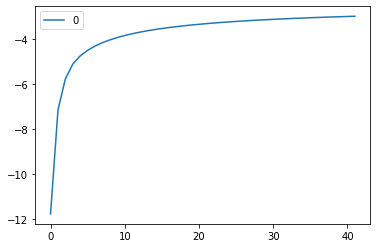

In [200]:
pd.DataFrame(log_likelihood_lst).plot()

This is probably using negative log-likelihood and it's attemption to minimize the error rate and that is evident from the plot. We can see that the function is approaching zero.

In [168]:
vars(model)

{'beta': [8.98302901571447, -0.03596896044485088, 0.021813956629835204]}

Note that β1 is negative, as gene pairs with a shorter intergene distance have a higher probability of belonging to the same operon (class OP). On the other hand, β2 is positive, as gene pairs belonging to the same operon typically have a higher similarity score of their gene expression profiles. The parameter β0 is positive due to the higher prevalence of operon gene pairs than non-operon gene pairs in the training data.

Now, let's use our classifier to classify unknown samples

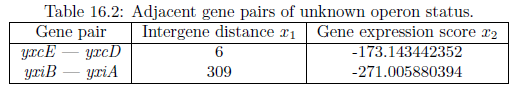

In [201]:
print("yxcE, yxcD:", LogisticRegression.classify(model, [6, -173.143442352]))
print("yxiB, yxiA:", LogisticRegression.classify(model, [309, -271.005880394]))

yxcE, yxcD: 1
yxiB, yxiA: 0


In [202]:
q, p = LogisticRegression.calculate(model, [6, -173.143442352])
print("class OP: probability =", p, "class NOP: probability =", q)

class OP: probability = 0.9932421635025626 class NOP: probability = 0.006757836497437442


In [203]:
q, p = LogisticRegression.calculate(model, [309, -271.005880394])
print("class OP: probability =", p, "class NOP: probability =", q)

class OP: probability = 0.00032121125181733316 class NOP: probability = 0.9996787887481826


These are pretty credible estimates given to us by our logistic regression classifier

In [205]:
# Leave one out
for i in range(len(ys)):
    model = LogisticRegression.train(xs[:i]+xs[i+1:], ys[:i]+ys[i+1:])
    print("Target:", ys[i], "Predicted:", LogisticRegression.classify(model, xs[i]))

Target: 1 Predicted: 1
Target: 1 Predicted: 0
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 1
Target: 0 Predicted: 0
Target: 0 Predicted: 0


The leave-one-out analysis shows that the prediction of the logistic regression model is incorrect for only two
of the gene pairs, which corresponds to a prediction accuracy of 88%.

In [209]:
df = pd.DataFrame(data=xs, columns=['inter-gene distance', 'gene expression similarity score']); df

,inter-gene distance,gene expression similarity score
0,-53,-200.78
1,117,-267.14
2,57,-163.47
3,16,-190.30
4,11,-220.94
5,85,-193.94
6,16,-182.71
7,15,-180.41
8,-26,-181.73
9,58,-259.87


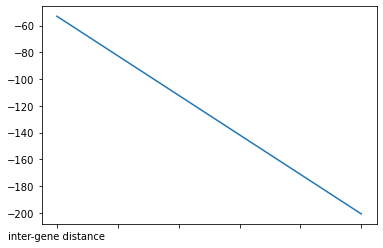

In [210]:
df.iloc[0].plot()

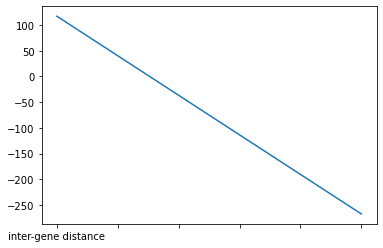

In [216]:
df.iloc[1].plot()

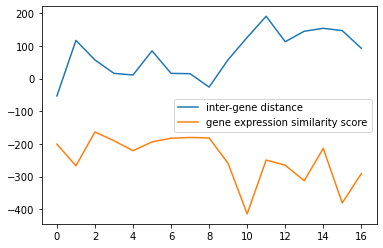

In [214]:
df.plot()

In [217]:
df.describeribe()

,inter-gene distance,gene expression similarity score
count,17.000000,17.000000
mean,74.411765,-245.262941
std,69.760357,71.979062
min,-53.000000,-414.530000
25%,16.000000,-267.140000
50%,85.000000,-220.940000
75%,126.000000,-190.300000
max,191.000000,-163.470000


In [223]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [232]:
import scipy
import numpy as np
def examine_distribution(sequence, title=''):
    # Calculate statistics
    mean = np.mean(sequence)
    median = np.median(sequence)
    mode = int(scipy.stats.mode(sequence).mode)
    statistics = {'Mean':mean,'Median':median,'Mode':mode}

    # Plot distribution
    fig, ax = plt.subplots()
    sns.distplot(sequence)
    ax.axvline(mean, color='r', linestyle='--')
    ax.axvline(median, color='g', linestyle='-')
    ax.axvline(mode, color='b', linestyle='-')

    plt.title(title.capitalize())
    plt.legend(statistics)
    plt.show()

    for key, value in statistics.items():
        print(f'\t{key}={value:.2f}')

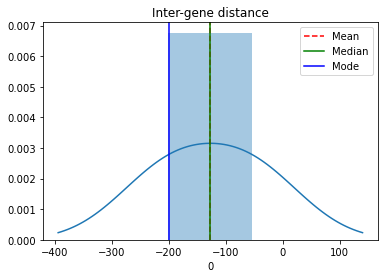

	Mean=-126.89
	Median=-126.89
	Mode=-200.00


In [235]:
i = 0
examine_distribution(df.iloc[i], title=df.columns[i])

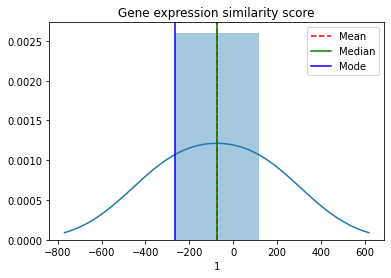

	Mean=-75.07
	Median=-75.07
	Mode=-267.00


In [236]:
i = 1
examine_distribution(df.iloc[i], title=df.columns[i])

These features look Gaussian, thus using Linear Discriminant Analysis should preform the best. <br>
Additionally, a relevance vector machine would probably perform better than an SVM due to this feature as well.

In [238]:
from sklearn import svm

In [240]:
clf = svm.SVC()
clf.fit(xs, ys)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [243]:
# Using leave one out
guesses = list()
for i in range(len(ys)):
    clf = svm.SVC()
    model = clf.fit(xs[:i]+xs[i+1:], ys[:i]+ys[i+1:])
    prediction = clf.predict(np.array(xs[i]).reshape(1,-1))[0]
    print("Target:", ys[i], "Predicted:", prediction)
    guesses.append(ys[i] == prediction)

Target: 1 Predicted: 1
Target: 1 Predicted: 0
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0


In [245]:
correct = 0
for guess in guesses:
    if guess == True:
        correct += 1
        
print('Accuracy:', correct / len(guesses))

Accuracy: 0.9411764705882353


In [248]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Using leave one out
guesses = list()
for i in range(len(ys)):
    clf = LinearDiscriminantAnalysis()
    model = clf.fit(xs[:i]+xs[i+1:], ys[:i]+ys[i+1:])
    prediction = clf.predict(np.array(xs[i]).reshape(1,-1))[0]
    print("Target:", ys[i], "Predicted:", prediction)
    guesses.append(ys[i] == prediction)

Target: 1 Predicted: 1
Target: 1 Predicted: 0
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 1 Predicted: 1
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0
Target: 0 Predicted: 0


In [249]:
correct = 0
for guess in guesses:
    if guess == True:
        correct += 1
        
print('Accuracy:', correct / len(guesses))

Accuracy: 0.9411764705882353


Well, the SVM and the LDA produce the exact same accuracy.

## Task 12. Да се испрограмира алгоритмот на Nussinov како функција во `Python` која на влез ќе добива стринг од нуклеотиди, а на излез ќе ја дава нивната секундарна структура. 
Влез нека биде следната tRNA молекула: 
`ACCGCGGGGCGUCCGGCUCAGCUUGCCGCUGCGGAGCGCCGCAGUAGCCGAAACUUCCGGCUCGGGCCGUGGGCGGUCUCUAGUCGCCCCG`

## Task 13. Да се истражи можноста на `biopython` за одредување на секундарна структураопишана во поглавје 11.6.8.